### About the company
In 2016, Cyclistic launched a successful bike-share offering. Since then, the program has grown to a fleet of 5,824 bicycles that
are geotracked and locked into a network of 692 stations across Chicago. The bikes can be unlocked from one station and
returned to any other station in the system anytime.<br>

Until now, Cyclistic’s marketing strategy relied on building general awareness and appealing to broad consumer segments.
One approach that helped make these things possible was the flexibility of its pricing plans: single-ride passes, full-day passes,
and annual memberships. Customers who purchase single-ride or full-day passes are referred to as casual riders. Customers
who purchase annual memberships are Cyclistic members.<br>

Cyclistic’s finance analysts have concluded that annual members are much more profitable than casual riders. Although the
pricing flexibility helps Cyclistic attract more customers, Moreno believes that maximizing the number of annual members will
be key to future growth. Rather than creating a marketing campaign that targets all-new customers, Moreno believes there is a
very good chance to convert casual riders into members. She notes that casual riders are already aware of the Cyclistic
program and have chosen Cyclistic for their mobility needs.<br>

**Moreno has set a clear goal:** Design marketing strategies aimed at converting casual riders into annual members. In order to
do that, however, the marketing analyst team needs to better understand how annual members and casual riders differ, why
casual riders would buy a membership, and how digital media could affect their marketing tactics. Moreno and her team are
interested in analyzing the Cyclistic historical bike trip data to identify trends.

### Ask 
1. How do annual members and casual riders use Cyclistic bikes differently?
2. Why would casual riders buy Cyclistic annual memberships?
3. How can Cyclistic use digital media to influence casual riders to become members?

**Business task:** 
1. We need to find ways of differentiating the bike usage of casual and annual members(used duration,frequency,number of days used,time of day used,gaps in usage etc.).<br>
2. Benefits for casual users moving to annual membership. 

**Stakeholder:** Lily Moreno(Director of marketing and my manager).

### Prepare
-   The source of the data is [here](https://divvy-tripdata.s3.amazonaws.com/index.html) which is provided by Motivate International Inc.
-   Data is collected from April 2022 to March 2023(Past 1 year).
-   The extracted data is in ./data folder.

Combining the past 12 months data into a single data frame and saving it in "202204-202303-divvy-tripdata.csv"

In [1]:
import pandas as pd
import numpy as np
file_folder_path = "./data"

In [2]:
file_paths = []
year = 2022
month = 4
total_files = 12
data = pd.DataFrame()
for i in range(total_files):
    file_name = str(year) + (str(month).zfill(2)) + "-divvy-tripdata.csv"
    file_path = file_folder_path + "/" + file_name
    file_paths.append(file_path)
    new_data = pd.read_csv(file_path)
    print("Read from {} with {} rows,{} columns and merged to data {} rows,{} columns".format(file_name,new_data.shape[0],new_data.shape[1],data.shape[0],data.shape[1]))
    data = pd.concat([data, new_data])
    month += 1
    if month > 12:
        month = 1
        year += 1
print("Combined the past 1 year data which has {} rows {} columns".format(data.shape[0],data.shape[1]))
data.to_csv(file_folder_path + "/" + "202204-202303-divvy-tripdata.csv",index=False)

Read from 202204-divvy-tripdata.csv with 371249 rows,13 columns and merged to data 0 rows,0 columns
Read from 202205-divvy-tripdata.csv with 634858 rows,13 columns and merged to data 371249 rows,13 columns
Read from 202206-divvy-tripdata.csv with 769204 rows,13 columns and merged to data 1006107 rows,13 columns
Read from 202207-divvy-tripdata.csv with 823488 rows,13 columns and merged to data 1775311 rows,13 columns
Read from 202208-divvy-tripdata.csv with 785932 rows,13 columns and merged to data 2598799 rows,13 columns
Read from 202209-divvy-tripdata.csv with 701339 rows,13 columns and merged to data 3384731 rows,13 columns
Read from 202210-divvy-tripdata.csv with 558685 rows,13 columns and merged to data 4086070 rows,13 columns
Read from 202211-divvy-tripdata.csv with 337735 rows,13 columns and merged to data 4644755 rows,13 columns
Read from 202212-divvy-tripdata.csv with 181806 rows,13 columns and merged to data 4982490 rows,13 columns
Read from 202301-divvy-tripdata.csv with 1903

In [3]:
data = pd.read_csv(file_folder_path + "/" + "202204-202303-divvy-tripdata.csv",parse_dates=["started_at","ended_at"])

In [4]:
data.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,3564070EEFD12711,electric_bike,2022-04-06 17:42:48,2022-04-06 17:54:36,Paulina St & Howard St,515,University Library (NU),605,42.019135,-87.673532,42.052939,-87.673447,member
1,0B820C7FCF22F489,classic_bike,2022-04-24 19:23:07,2022-04-24 19:43:17,Wentworth Ave & Cermak Rd,13075,Green St & Madison St,TA1307000120,41.853085,-87.631931,41.881892,-87.648789,member
2,89EEEE32293F07FF,classic_bike,2022-04-20 19:29:08,2022-04-20 19:35:16,Halsted St & Polk St,TA1307000121,Green St & Madison St,TA1307000120,41.871840,-87.646640,41.881892,-87.648789,member
3,84D4751AEB31888D,classic_bike,2022-04-22 21:14:06,2022-04-22 21:23:29,Wentworth Ave & Cermak Rd,13075,Delano Ct & Roosevelt Rd,KA1706005007,41.853085,-87.631931,41.867491,-87.632190,casual
4,5664BCF0D1DE7A8B,electric_bike,2022-04-16 15:56:30,2022-04-16 16:02:11,Halsted St & Polk St,TA1307000121,Clinton St & Madison St,TA1305000032,41.871808,-87.646574,41.882242,-87.641066,member


In [5]:
data.sort_values(by=["started_at"],inplace=True)

Missing data per column in percentage

In [6]:
missing_stat = data.isna().sum()/data.shape[0]*100
missing_stat = missing_stat[missing_stat>0]
missing_stat

start_station_name    14.457658
start_station_id      14.459933
end_station_name      15.443870
end_station_id        15.446300
end_lat                0.100884
end_lng                0.100884
dtype: float64

In [7]:
data.groupby(["rideable_type"])["start_station_name","start_station_id","end_station_name","end_station_id","end_lat","end_lng"].apply(lambda x:x.isna().sum())

C:\Users\sgoku\AppData\Local\Temp\ipykernel_16248\1115945165.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data.groupby(["rideable_type"])["start_station_name","start_station_id","end_station_name","end_station_id","end_lat","end_lng"].apply(lambda x:x.isna().sum())


,start_station_name,start_station_id,end_station_name,end_station_id,end_lat,end_lng
rideable_type,,,,,,
classic_bike,0,68,3336,3414,3234,3234
docked_bike,0,0,2621,2621,2621,2621
electric_bike,839082,839146,890362,890425,0,0


<Axes: >

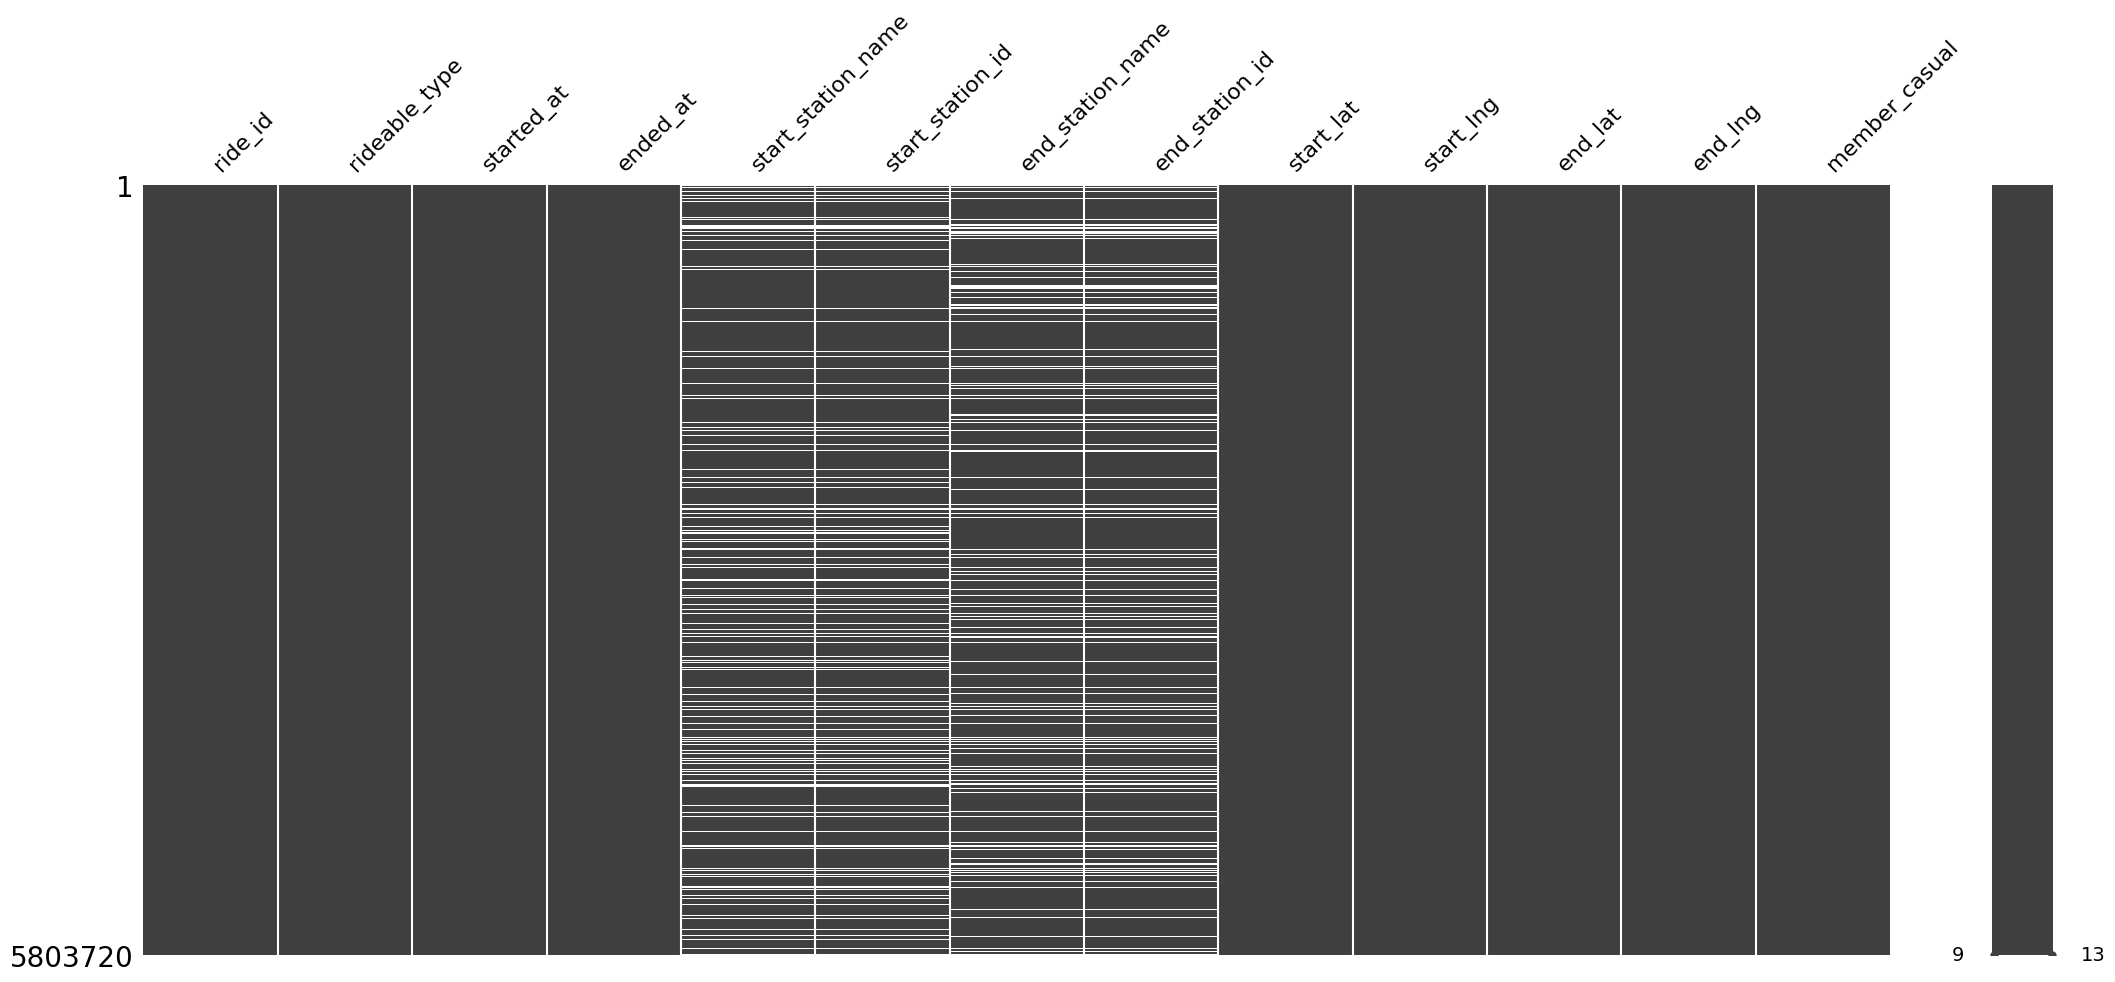

In [8]:
import missingno as mno
mno.matrix(data)

As the station id, name and location are not that much related to the business task in hand,We are choosing to ignore them.<br>
Renaming the column names to improve readability.

In [9]:
data.rename(columns = {
    "ride_id" : "trip_id",
    "rideable_type" : "bike_type",
    "started_at" : "start_time", 
    "ended_at" : "end_time",
    "start_station_name" : "from_station_name", 
    "start_station_id" : "from_station_id",
    "end_station_name" : "to_station_name",
    "end_station_id" : "to_station_id",
    "member_casual" : "user_type"
}, inplace = True)

### Process

Checking if all start date is less than end date, switching them if any wrong entries found

In [10]:
wrongtime_index = data[data["start_time"]>data["end_time"]].index

In [11]:
for ind in wrongtime_index:
    start = data.loc[ind,"start_time"]
    end = data.loc[ind,"end_time"]
    data.loc[ind,"start_time"] = end
    data.loc[ind,"end_time"] = start

Creating two new columns for ride length and ride day of week.

In [12]:
data["ride_length"] = data["end_time"]-data["start_time"]
data["day_of_week"] = data["start_time"].dt.day_name()

In [13]:
data.head()

,trip_id,bike_type,start_time,end_time,from_station_name,from_station_id,to_station_name,to_station_id,start_lat,start_lng,end_lat,end_lng,user_type,ride_length,day_of_week
248629,AFDC60E4BD0755EB,electric_bike,2022-04-01 00:01:48,2022-04-01 00:07:46,Base - 2132 W Hubbard Warehouse,Hubbard Bike-checking (LBS-WH-TEST),NaN,NaN,41.936344,-87.653704,41.940000,-87.640000,member,0 days 00:05:58,Friday
154643,6DFBE82AEF4187C0,electric_bike,2022-04-01 00:01:53,2022-04-01 00:02:15,Kedzie Ave & 48th Pl,382,Kedzie Ave & 48th Pl,382,41.800000,-87.700000,41.800000,-87.700000,casual,0 days 00:00:22,Friday
268592,3A2D92FB6FBAD9EE,electric_bike,2022-04-01 00:02:08,2022-04-01 00:10:29,NaN,NaN,NaN,NaN,41.780000,-87.600000,41.790000,-87.600000,member,0 days 00:08:21,Friday
59075,B0AD95376AEB3B2E,electric_bike,2022-04-01 00:02:30,2022-04-01 00:36:12,Michigan Ave & 14th St,TA1307000124,Lakeview Ave & Fullerton Pkwy,TA1309000019,41.864014,-87.623794,41.925858,-87.638973,casual,0 days 00:33:42,Friday
194897,A8C2D3959E611A65,electric_bike,2022-04-01 00:03:15,2022-04-01 00:07:07,NaN,NaN,Broadway & Ridge Ave,15578,41.990000,-87.670000,41.984045,-87.660274,member,0 days 00:03:52,Friday


### Analyse

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5803720 entries, 248629 to 5774990
Data columns (total 15 columns):
 #   Column             Dtype          
---  ------             -----          
 0   trip_id            object         
 1   bike_type          object         
 2   start_time         datetime64[ns] 
 3   end_time           datetime64[ns] 
 4   from_station_name  object         
 5   from_station_id    object         
 6   to_station_name    object         
 7   to_station_id      object         
 8   start_lat          float64        
 9   start_lng          float64        
 10  end_lat            float64        
 11  end_lng            float64        
 12  user_type          object         
 13  ride_length        timedelta64[ns]
 14  day_of_week        object         
dtypes: datetime64[ns](2), float64(4), object(8), timedelta64[ns](1)
memory usage: 837.5+ MB


Stats for the newly created columns

In [15]:
data["ride_length"].describe()

count                      5803720
mean     0 days 00:18:59.019875872
std      0 days 02:53:45.048757943
min                0 days 00:00:00
25%                0 days 00:05:41
50%                0 days 00:10:02
75%                0 days 00:18:01
max               28 days 17:47:15
Name: ride_length, dtype: object

In [16]:
data["day_of_week"].mode()

0    Saturday
Name: day_of_week, dtype: object

In [17]:
pd.pivot_table(data, values="ride_length", index=["user_type"], aggfunc=np.mean)

,ride_length
user_type,
casual,0 days 00:28:36.158800721
member,0 days 00:12:29.834166070


In [18]:
pd.pivot_table(
    data,
    values="ride_length",
    index=["user_type"],
    columns=["day_of_week"],
    aggfunc=np.mean,
)

day_of_week,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
user_type,,,,,,,
casual,0 days 00:27:42.030644082,0 days 00:28:27.590592536,0 days 00:32:19.737268309,0 days 00:33:32.334701046,0 days 00:24:49.418456869,0 days 00:25:20.606020185,0 days 00:24:00.785586744
member,0 days 00:12:19.832659327,0 days 00:12:01.005243813,0 days 00:13:58.043162078,0 days 00:13:50.060662328,0 days 00:12:05.542890371,0 days 00:11:54.534601408,0 days 00:11:52.598485611


In [19]:
pd.pivot_table(
    data,
    values="ride_length",
    index=["user_type"],
    columns=["day_of_week"],
    aggfunc="count",
)

day_of_week,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
user_type,,,,,,,
casual,341012,275696,471481,389458,311743,271387,276662
member,489857,484571,452133,397990,551161,544342,546227


### Share

In [20]:
from plotnine import *
import matplotlib.pyplot as plt

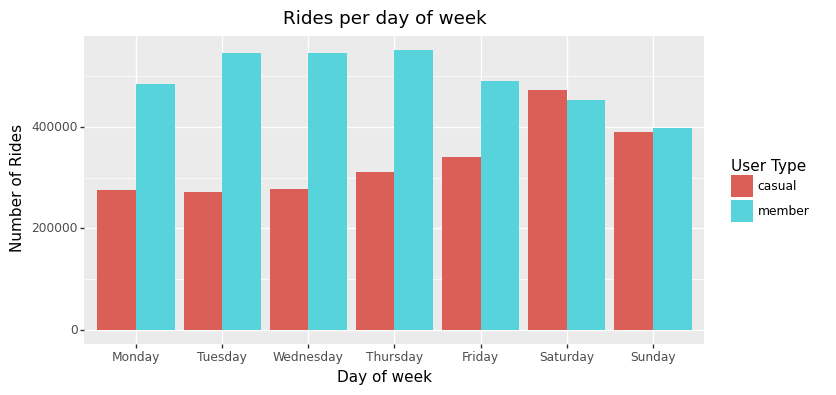

<ggplot: (95770747621)>

In [82]:
viz = data[["day_of_week","user_type"]]
(
    ggplot(viz)
    + geom_bar(
        position="dodge",
        mapping=aes(
            x="day_of_week",
            fill="user_type",
        ),
    )
    + scale_x_discrete(
        limits=[
            "Monday",
            "Tuesday",
            "Wednesday",
            "Thursday",
            "Friday",
            "Saturday",
            "Sunday",
        ]
    )
    + labs(
        title="Rides per day of week",
        x="Day of week",
        y="Number of Rides",
    )
    + guides(fill=guide_legend(title="User Type"))
    + theme(figure_size=(8,4))
)

In [22]:
data["month_of_year"] = data["start_time"].dt.month_name()
data.head()

,trip_id,bike_type,start_time,end_time,from_station_name,from_station_id,to_station_name,to_station_id,start_lat,start_lng,end_lat,end_lng,user_type,ride_length,day_of_week,month_of_year
248629,AFDC60E4BD0755EB,electric_bike,2022-04-01 00:01:48,2022-04-01 00:07:46,Base - 2132 W Hubbard Warehouse,Hubbard Bike-checking (LBS-WH-TEST),NaN,NaN,41.936344,-87.653704,41.940000,-87.640000,member,0 days 00:05:58,Friday,April
154643,6DFBE82AEF4187C0,electric_bike,2022-04-01 00:01:53,2022-04-01 00:02:15,Kedzie Ave & 48th Pl,382,Kedzie Ave & 48th Pl,382,41.800000,-87.700000,41.800000,-87.700000,casual,0 days 00:00:22,Friday,April
268592,3A2D92FB6FBAD9EE,electric_bike,2022-04-01 00:02:08,2022-04-01 00:10:29,NaN,NaN,NaN,NaN,41.780000,-87.600000,41.790000,-87.600000,member,0 days 00:08:21,Friday,April
59075,B0AD95376AEB3B2E,electric_bike,2022-04-01 00:02:30,2022-04-01 00:36:12,Michigan Ave & 14th St,TA1307000124,Lakeview Ave & Fullerton Pkwy,TA1309000019,41.864014,-87.623794,41.925858,-87.638973,casual,0 days 00:33:42,Friday,April
194897,A8C2D3959E611A65,electric_bike,2022-04-01 00:03:15,2022-04-01 00:07:07,NaN,NaN,Broadway & Ridge Ave,15578,41.990000,-87.670000,41.984045,-87.660274,member,0 days 00:03:52,Friday,April


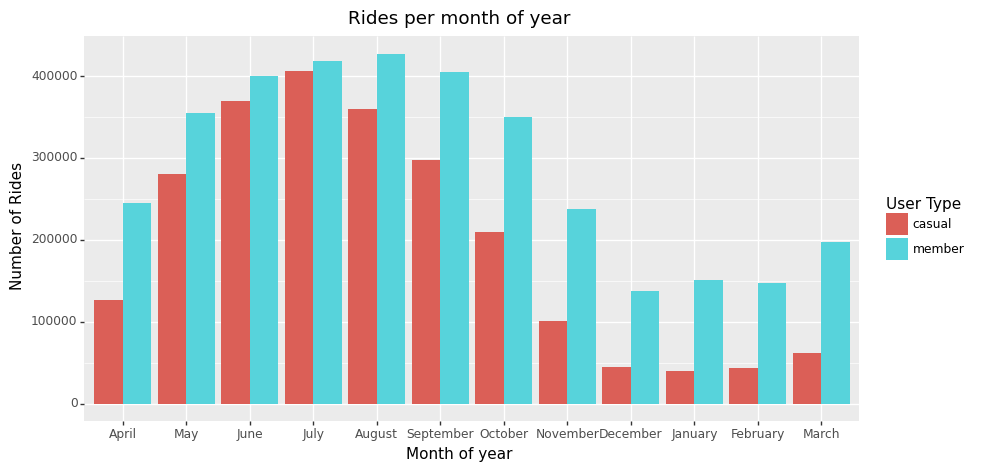

<ggplot: (95718683273)>

In [23]:
(
    ggplot(data)
    + geom_bar(
        position="dodge",
        mapping=aes(
            x="month_of_year",
            fill="user_type",
        ),
    )
    + scale_x_discrete(
        limits=[
            "April",
            "May",
            "June",
            "July",
            "August",
            "September",
            "October",
            "November",
            "December",
            "January",
            "February",
            "March",
        ]
    )
    + labs(
        title="Rides per month of year",
        x="Month of year",
        y="Number of Rides",
    )
    + guides(fill=guide_legend(title="User Type"))
    + theme(figure_size=(10, 5))
)

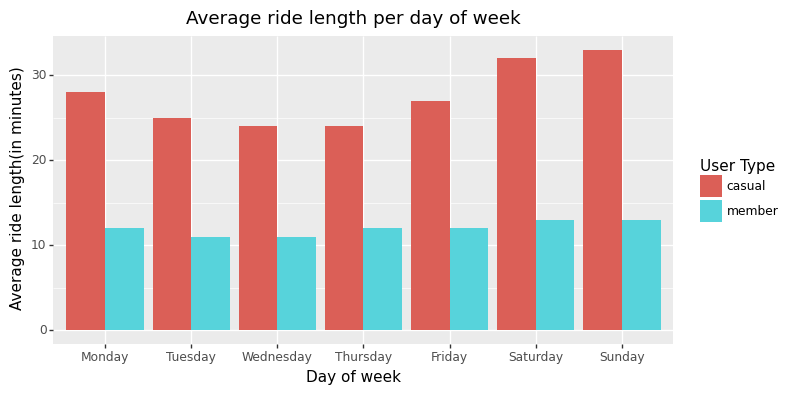

<ggplot: (95768089809)>

In [79]:
viz = data.groupby(["day_of_week","user_type"])["ride_length"].mean().to_frame().reset_index()
viz["ride_length"] = viz["ride_length"].dt.total_seconds()//60
(
    ggplot(viz)
    + geom_bar(
        position="dodge",
        mapping=aes(
            x="day_of_week",
            y="ride_length",
            fill="user_type",
        ),
        stat = "identity"
    )
    + scale_x_discrete(
        limits=[
            "Monday",
            "Tuesday",
            "Wednesday",
            "Thursday",
            "Friday",
            "Saturday",
            "Sunday",
        ]
    )
    + labs(
        title="Average ride length per day of week",
        x="Day of week",
        y="Average ride length(in minutes)",
    )
    + guides(fill=guide_legend(title="User Type"))
    + theme(figure_size=(8, 4))
)

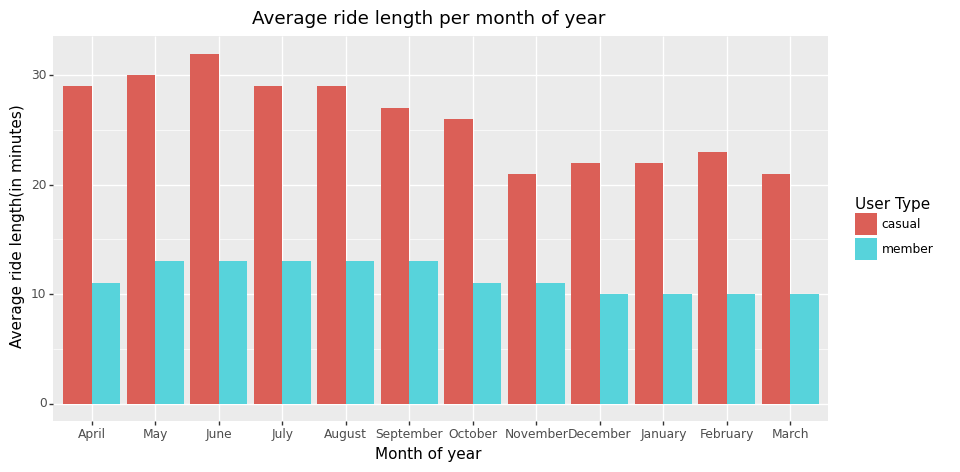

<ggplot: (95718654925)>

In [74]:
viz = data.groupby(["month_of_year","user_type"])["ride_length"].mean().to_frame().reset_index()
viz["ride_length"] = viz["ride_length"].dt.total_seconds()//60
(
    ggplot(viz)
    + geom_bar(
        position="dodge",
        mapping=aes(
            x="month_of_year",
            y="ride_length",
            fill="user_type",
        ),
        stat="identity",
    )
    + scale_x_discrete(
        limits=[
            "April",
            "May",
            "June",
            "July",
            "August",
            "September",
            "October",
            "November",
            "December",
            "January",
            "February",
            "March",
        ]
    )
    + labs(
        title="Average ride length per month of year",
        x="Month of year",
        y="Average ride length(in minutes)",
    )
    + guides(fill=guide_legend(title="User Type"))
    + theme(figure_size=(10, 5))
)


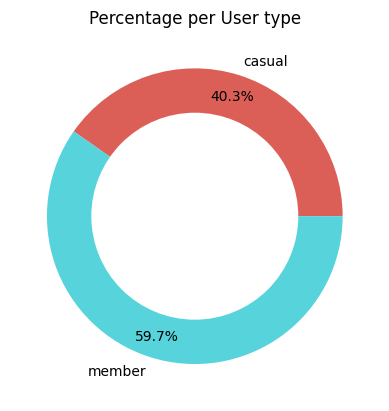

In [26]:
viz = data.groupby(["user_type"]).size().to_frame("count").reset_index()
colors = ["#db5f57","#57d3db"]
plt.pie(viz["count"], labels=viz["user_type"], colors=colors,autopct="%1.1f%%", pctdistance=0.85)
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title("Percentage per User type")
plt.show()

In [27]:
data.head()

,trip_id,bike_type,start_time,end_time,from_station_name,from_station_id,to_station_name,to_station_id,start_lat,start_lng,end_lat,end_lng,user_type,ride_length,day_of_week,month_of_year
248629,AFDC60E4BD0755EB,electric_bike,2022-04-01 00:01:48,2022-04-01 00:07:46,Base - 2132 W Hubbard Warehouse,Hubbard Bike-checking (LBS-WH-TEST),NaN,NaN,41.936344,-87.653704,41.940000,-87.640000,member,0 days 00:05:58,Friday,April
154643,6DFBE82AEF4187C0,electric_bike,2022-04-01 00:01:53,2022-04-01 00:02:15,Kedzie Ave & 48th Pl,382,Kedzie Ave & 48th Pl,382,41.800000,-87.700000,41.800000,-87.700000,casual,0 days 00:00:22,Friday,April
268592,3A2D92FB6FBAD9EE,electric_bike,2022-04-01 00:02:08,2022-04-01 00:10:29,NaN,NaN,NaN,NaN,41.780000,-87.600000,41.790000,-87.600000,member,0 days 00:08:21,Friday,April
59075,B0AD95376AEB3B2E,electric_bike,2022-04-01 00:02:30,2022-04-01 00:36:12,Michigan Ave & 14th St,TA1307000124,Lakeview Ave & Fullerton Pkwy,TA1309000019,41.864014,-87.623794,41.925858,-87.638973,casual,0 days 00:33:42,Friday,April
194897,A8C2D3959E611A65,electric_bike,2022-04-01 00:03:15,2022-04-01 00:07:07,NaN,NaN,Broadway & Ridge Ave,15578,41.990000,-87.670000,41.984045,-87.660274,member,0 days 00:03:52,Friday,April


In [28]:
data["time_of_day"] = data["start_time"].dt.hour
# data["time_of_day"] = data["time_of_day"].astype(str)
data.head()

,trip_id,bike_type,start_time,end_time,from_station_name,from_station_id,to_station_name,to_station_id,start_lat,start_lng,end_lat,end_lng,user_type,ride_length,day_of_week,month_of_year,time_of_day
248629,AFDC60E4BD0755EB,electric_bike,2022-04-01 00:01:48,2022-04-01 00:07:46,Base - 2132 W Hubbard Warehouse,Hubbard Bike-checking (LBS-WH-TEST),NaN,NaN,41.936344,-87.653704,41.940000,-87.640000,member,0 days 00:05:58,Friday,April,0
154643,6DFBE82AEF4187C0,electric_bike,2022-04-01 00:01:53,2022-04-01 00:02:15,Kedzie Ave & 48th Pl,382,Kedzie Ave & 48th Pl,382,41.800000,-87.700000,41.800000,-87.700000,casual,0 days 00:00:22,Friday,April,0
268592,3A2D92FB6FBAD9EE,electric_bike,2022-04-01 00:02:08,2022-04-01 00:10:29,NaN,NaN,NaN,NaN,41.780000,-87.600000,41.790000,-87.600000,member,0 days 00:08:21,Friday,April,0
59075,B0AD95376AEB3B2E,electric_bike,2022-04-01 00:02:30,2022-04-01 00:36:12,Michigan Ave & 14th St,TA1307000124,Lakeview Ave & Fullerton Pkwy,TA1309000019,41.864014,-87.623794,41.925858,-87.638973,casual,0 days 00:33:42,Friday,April,0
194897,A8C2D3959E611A65,electric_bike,2022-04-01 00:03:15,2022-04-01 00:07:07,NaN,NaN,Broadway & Ridge Ave,15578,41.990000,-87.670000,41.984045,-87.660274,member,0 days 00:03:52,Friday,April,0


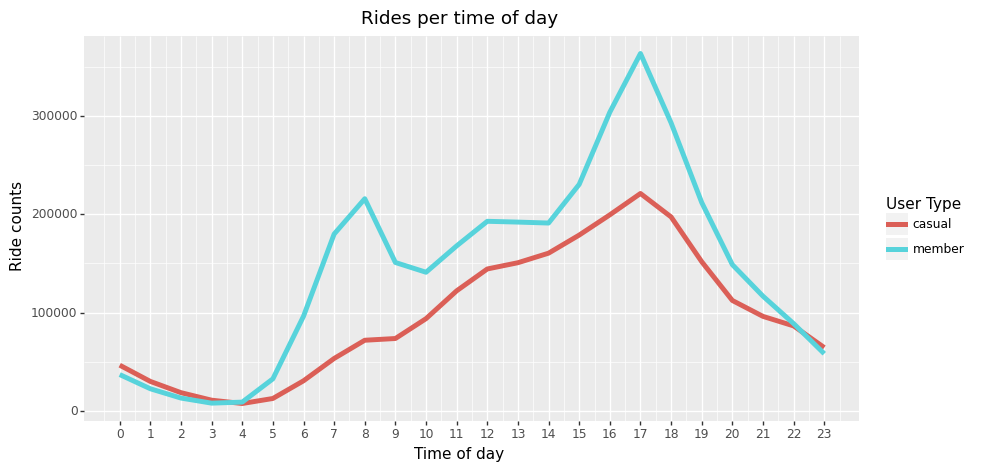

<ggplot: (95767950253)>

In [29]:
viz = data.groupby(["time_of_day", "user_type"]).size().to_frame("count").reset_index()
(
    ggplot(
        viz,
        mapping=aes(
            x="time_of_day",
            y="count",
            colour="user_type",
        ),
    )
    + geom_line(
        size=2,
    )
    + scale_x_continuous(breaks=range(0, 24, 1))
    + labs(
        title="Rides per time of day",
        x="Time of day",
        y="Ride counts",
    )
    + guides(color=guide_legend(title="User Type"))
    + theme(figure_size=(10, 5))
)

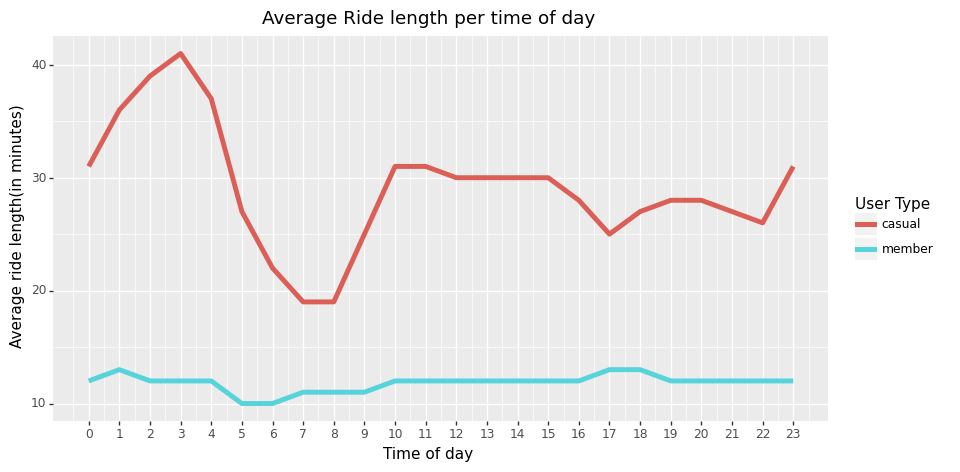

<ggplot: (95718654789)>

In [73]:
viz = (
    data.groupby(["time_of_day", "user_type"])["ride_length"]
    .mean()
    .to_frame("avg_ride_length")
    .reset_index()
)
viz["avg_ride_length"] = viz["avg_ride_length"].dt.total_seconds()//60
(
    ggplot(
        viz,
        mapping=aes(
            x="time_of_day",
            y="avg_ride_length",
            colour="user_type",
        ),
    )
    + geom_line(
        size=2,
    )
    + scale_x_continuous(breaks=range(0, 24, 1))
    + labs(
        title="Average Ride length per time of day",
        x="Time of day",
        y="Average ride length(in minutes)",
    )
    + guides(color=guide_legend(title="User Type"))
    + theme(figure_size=(10, 5))
)

In [31]:
def month_to_season(month):
    if month in ["December","January","February"]:
        return "winter"
    elif month in ["October","November"]:
        return "autumn"
    elif month in ["March","April","May"]:
        return "spring"
    else:
        return "summer"

In [32]:
data["season"] = data['month_of_year'].apply(month_to_season)

In [33]:
data.to_csv(file_folder_path + "/" + "202204-202303-divvy-tripdata-updated.csv",index=False)

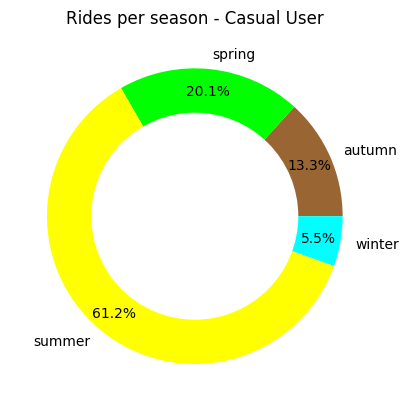

In [55]:
season_stats = (
    data.groupby(["season", "user_type"]).size().to_frame("count").reset_index()
)
casual_season_stat = season_stats[season_stats["user_type"] == "casual"]
member_season_stat = season_stats[season_stats["user_type"] == "member"]

colors = ["#996633", "#00ff00","#ffff00","#00ffff"]
plt.pie(
    casual_season_stat["count"],
    labels=casual_season_stat["season"],
    colors=colors,
    autopct="%1.1f%%",
    pctdistance=0.85,
)
centre_circle = plt.Circle((0, 0), 0.70, fc="white")
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title("Rides per season - Casual User")
plt.show()

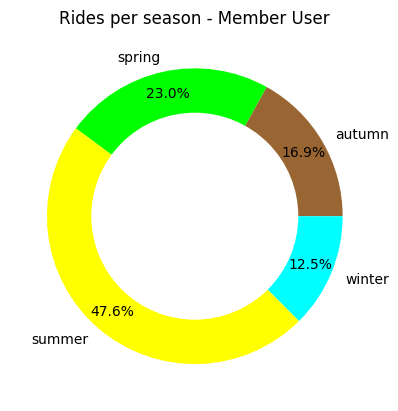

In [56]:
plt.pie(
    member_season_stat["count"],
    labels=member_season_stat["season"],
    colors=colors,
    autopct="%1.1f%%",
    pctdistance=0.85,
)
centre_circle = plt.Circle((0, 0), 0.70, fc="white")
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title("Rides per season - Member User")
plt.show()

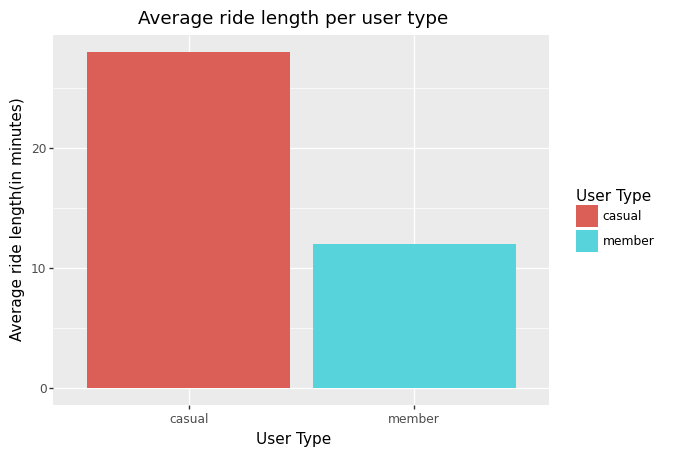

<ggplot: (95718684877)>

In [77]:
viz = (data.groupby(["user_type"])["ride_length"].mean().dt.seconds//60).to_frame("avg_ride_length").reset_index()
(
    ggplot(viz)
    + geom_bar(
        position="dodge",
        mapping=aes(
            x="user_type",
            y="avg_ride_length",
            fill="user_type",
        ),
        stat="identity",
    )
    + labs(
        title="Average ride length per user type",
        x="User Type",
        y="Average ride length(in minutes)",
    )
    + guides(fill=guide_legend(title="User Type"))
    #+ theme(figure_size=(10, 5))
)

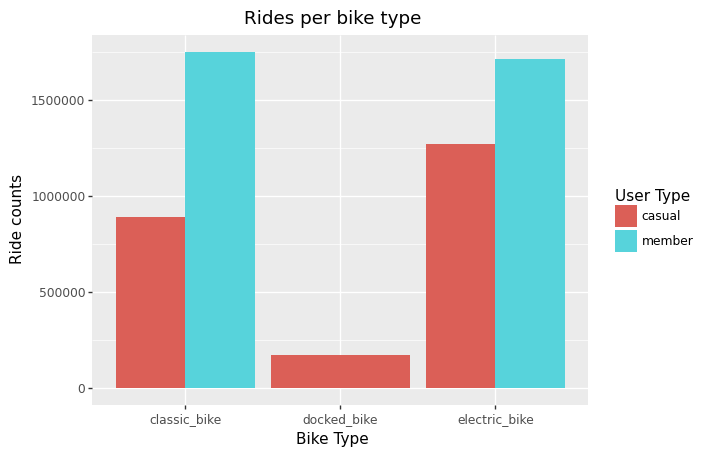

<ggplot: (95718673645)>

In [86]:
viz = (data.groupby(["user_type","bike_type"]).size()).to_frame("count").reset_index()
(
    ggplot(viz)
    + geom_bar(
        position="dodge",
        mapping=aes(
            x="bike_type",
            y="count",
            fill="user_type",
        ),
        stat="identity",
    )
    + labs(
        title="Rides per bike type",
        x="Bike Type",
        y="Ride counts",
    )
    + guides(fill=guide_legend(title="User Type"))
    #+ theme(figure_size=(10, 5))
)